In [1]:
import pandas as pd

In [48]:
df = pd.read_csv("data.csv", index_col=0)

In [49]:
df.head()

,body,analysis,algorithms,jupyter,euler,probability_distribution,r,bayesian,update,linear_algebra,...,from_scratch,simulation,pytorch,nlp,statistics,monte_carlo,deep_learning,tensorflow,machine_learning,regression
title,,,,,,,,,,,,,,,,,,,,,
2020-05-27-natural-gradient,"in a previous post, we took a look at fisher's...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2020-01-15-first-keras,"lately, i have been on a spree after unlocking...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
2020-02-18-autoencoder,"in today's post, we will take yet another look...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2020-08-15-rerent-summer,"for the past month and a half, i've been worki...",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2019-11-22-gamma,"in a , we looked at the poisson distribution a...",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df.shape

(78, 21)

In [51]:
df["pytorch"].value_counts()

0    73
1     5
Name: pytorch, dtype: int64

In [52]:
df.columns

Index(['body', 'analysis', 'algorithms', 'jupyter', 'euler',
       'probability_distribution', 'r', 'bayesian', 'update', 'linear_algebra',
       'markov_chain', 'from_scratch', 'simulation', 'pytorch', 'nlp',
       'statistics', 'monte_carlo', 'deep_learning', 'tensorflow',
       'machine_learning', 'regression'],
      dtype='object')

In [53]:
counts = df[df.columns[1:]].apply(sum).sort_values()
counts

algorithms                   2
euler                        3
markov_chain                 4
monte_carlo                  4
nlp                          4
bayesian                     4
regression                   4
simulation                   5
pytorch                      5
update                       6
jupyter                      6
r                            6
probability_distribution     7
tensorflow                   7
analysis                     7
linear_algebra               8
from_scratch                11
machine_learning            13
deep_learning               17
statistics                  20
dtype: int64

In [77]:
len(counts)

20

In [54]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

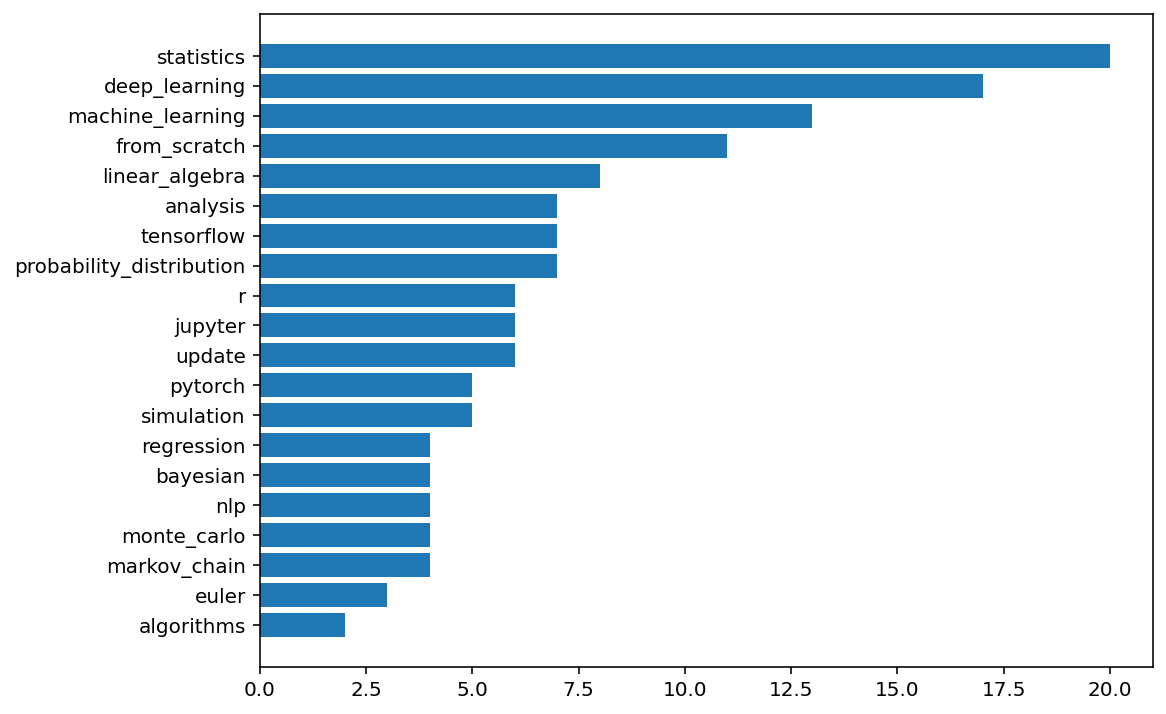

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(counts.index, counts.values)
plt.show()

In [56]:
count_words = lambda x: len(x.split())

word_count = df["body"].apply(count_words).sort_values()
word_count

title
2020-01-09-R-tutorial                  77
2019-11-29-test                       362
2020-01-26-typora                     476
2019-11-07-studying-deep-learning     477
2020-04-01-stirling                   554
                                     ... 
2019-12-31-logistic-regression       3023
2019-12-21-information-entropy       3162
2019-11-28-bayes                     3199
2019-12-07-svd                       3657
2020-02-05-neural-net                4082
Name: body, Length: 78, dtype: int64

In [61]:
word_count.values

array([  77,  362,  476,  477,  554,  564,  651,  659,  706,  740,  798,
        811,  820,  825,  831,  951,  989, 1011, 1050, 1106, 1178, 1183,
       1196, 1199, 1207, 1221, 1351, 1393, 1412, 1420, 1435, 1441, 1498,
       1517, 1566, 1597, 1602, 1608, 1634, 1657, 1725, 1780, 1782, 1800,
       1814, 1815, 1829, 1838, 1924, 1946, 1955, 2018, 2020, 2057, 2155,
       2158, 2181, 2204, 2227, 2313, 2349, 2416, 2473, 2596, 2599, 2694,
       2728, 2746, 2775, 2783, 2812, 2858, 2975, 3023, 3162, 3199, 3657,
       4082])

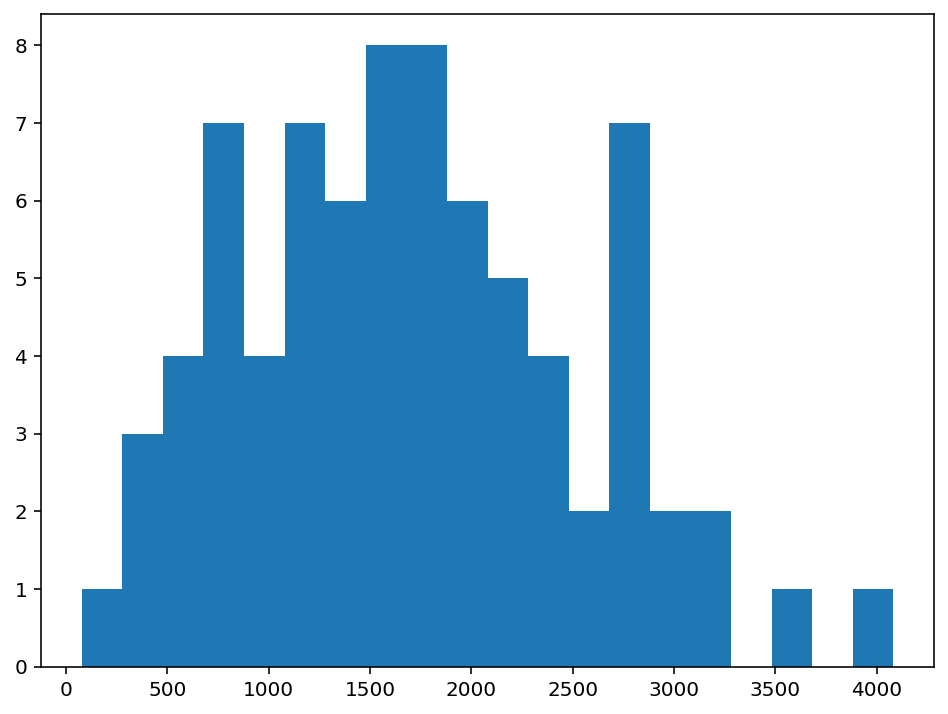

In [74]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(word_count.values, bins=20)
plt.show()

In [75]:
df["body"][0]

"in a previous post, we took a look at fisher's information matrix. today, we will be taking a break from the r frenzy and continue our exploration of this topic, meshing together related ideas such as gradient descent, kl divergence, hessian, and more. the typical formula for batch gradient descent looks something like this: this is the familiar gradient descent algorithm that we know of. while this approach works and certainly makes sense, there are definite limitations; hence the introduction of other more efficient algorithms such as sgd, adam, and et cetera. however, these algorithms all have one thing in common: they adjust the parameter in the parameter space according to euclidean distance. in other words, gradient descent essentially looks at regions that are some euclidean distance away from the current parameter and chooses the direction of steepest descent. this is where the notion of natural gradients come into play: if our goal is to minimize the cost function, which is e

In [76]:
df["body"][1]

"lately, i have been on a spree after unlocking a two month free unlimited trial through microsoft's . if you haven't already, make sure to check it out, as it offers a plethora of tools, journal subscriptions, and software packages for developers. anyhow, one of the courses i decided to check out on datacamp was titled introduction to deep learning with python, which covered basic concepts in deep learning such as forward and backward propagation. the latter half of the tutorial was devoted to the introduction of the and the implementation of neural networks. i created this notebook immediately after finishing the tutorial for memory retention and self review purposes. first, we begin by importing the library as well as other affiliated functions in the module. note that keras uses tensorflow as backend by default. the warning in the code block below appears because this notebook was written on , which informs users that the platform will be switching over to tensorflow 2 in the futur